# 3.2 K-Nearest

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

Load the small image data set.

In [2]:
npzfile = np.load('../data/image_data_10.npz')

In [3]:
X = npzfile['arr_0']
y = npzfile['arr_1']

In [4]:
# reshape 
X = np.reshape(X, (X.shape[0], X.shape[1]*X.shape[2]*X.shape[3]))

In [5]:
# split into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# define grid for grid search
n_neighbors_range = np.linspace(1, 10, 10, dtype=np.int8)
metrics_range = ['euclidean', 'minkowski']
param_grid = dict(n_neighbors=n_neighbors_range, metric=metrics_range)

In [7]:
# find the best parameters for the model
grid = GridSearchCV(
    KNeighborsClassifier(), 
    param_grid=param_grid,  
    cv=StratifiedKFold(n_splits=3),
    n_jobs=8,
    verbose=1000)

grid.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Memmaping (shape=(1212, 67500), dtype=float64) to new file C:\Users\flori\AppData\Local\Temp\joblib_memmaping_pool_4588_1606588853888\4588-1606589071656-2898dbb030e98a4a31c8c039fc3d6992.pkl
Pickling array (shape=(1212,), dtype=int32).
Pickling array (shape=(806,), dtype=int32).
Pickling array (shape=(406,), dtype=int32).
Memmaping (shape=(1212, 67500), dtype=float64) to old file C:\Users\flori\AppData\Local\Temp\joblib_memmaping_pool_4588_1606588853888\4588-1606589071656-2898dbb030e98a4a31c8c039fc3d6992.pkl
Pickling array (shape=(1212,), dtype=int32).
Pickling array (shape=(808,), dtype=int32).
Pickling array (shape=(404,), dtype=int32).
Memmaping (shape=(1212, 67500), dtype=float64) to old file C:\Users\flori\AppData\Local\Temp\joblib_memmaping_pool_4588_1606588853888\4588-1606589071656-2898dbb030e98a4a31c8c039fc3d6992.pkl
Pickling array (shape=(1212,), dtype=int32).
Pickling array (shape=(810,), dtype=int32).
Pickling array

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
       error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=8,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int8), 'metric': ['euclidean', 'minkowski']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1000)

In [8]:
# {'metric': 'euclidean', 'n_neighbors': 10} were the best fitting parameters in this setup
grid.best_params_

{'metric': 'euclidean', 'n_neighbors': 10}

In [7]:
# use the best parameters for the model
best_n_neighbors = 10
best_metric = 'euclidean'

In [8]:
# fit the model with the best parameters
clf = KNeighborsClassifier(n_neighbors=best_n_neighbors, metric=best_metric)
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [9]:
# score on test data
clf.score(X_test, y_test)

0.40924092409240925

In [10]:
# score on training data
clf.score(X_train, y_train)

0.40016501650165015

In [11]:
y_pred = clf.predict(X_test)

In [29]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Confusion matrix, without normalization
[[ 8  0  0  2  0  0  0  6  1  1  1]
 [ 2  0  0  0  0  0  0  9  1  1  1]
 [ 2  0 23  0  0  1  2  2  1  0  0]
 [ 4  0  0 15  1  0  2  7  0  1  0]
 [ 2  0  5  0 18  0  1  3  0  2  0]
 [ 0  0  0  1  0  1  0  8  0  0  0]
 [ 6  0  0  0  1  0  1  5  2  0  0]
 [ 3  0  0  2  0  1  0 43  0  0  2]
 [ 8  0  0  0  0  0  3  9  1  0  1]
 [ 0  1  2  0  1  0  4 13  3  5  2]
 [13  0  0  0  1  0  3 22  1  0  9]]


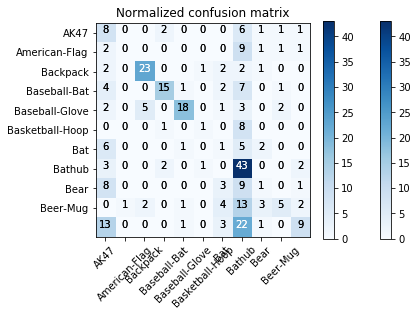

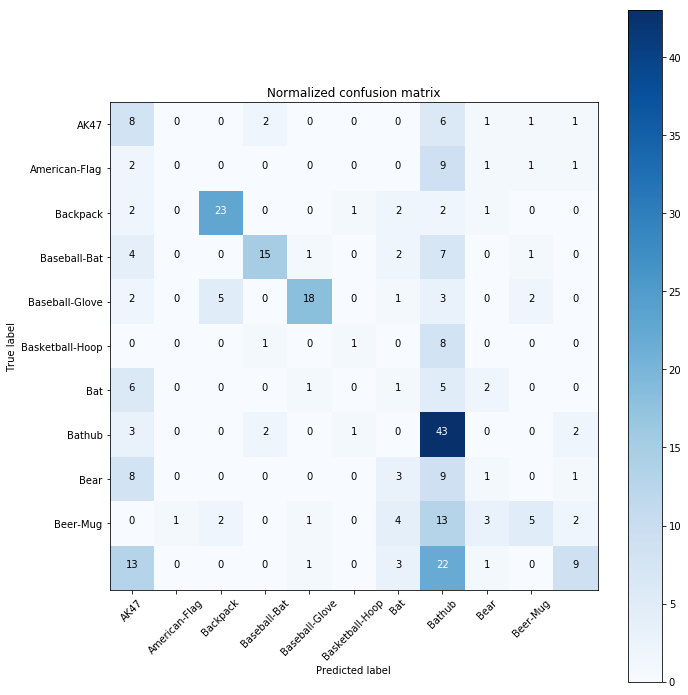

In [30]:
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

class_names = ['AK47', 'American-Flag', 'Backpack', 'Baseball-Bat', 
               'Baseball-Glove', 'Basketball-Hoop', 'Bat', 'Bathub',
               'Bear', 'Beer-Mug']

plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=False,
                      title='Normalized confusion matrix')
plt.show()